In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Data Processing

In [2]:
df = pd.read_csv('UsedCar_2.csv')
df

,Status,AutoModel,Millage,Price,45,119,192,265
0,Used ...,2017 GMC Savana 2...,"45,623 mi...","$19,995 ...",White,Gray,Automatic,RWD
1,Used ...,2012 Jeep Grand C...,"87,244 mi...","$9,995 ...",Black,Other,Automatic,4x4/4-wheel
2,Used ...,2019 Nissan Sentr...,"8,464 mi....","$10,395 ...",Black,Black,CVT,FWD
3,Used ...,2015 Nissan Versa...,"45,466 mi...","$10,590 ...",Red,Black,CVT,FWD
4,Used ...,2019 Chevrolet Eq...,"27,929 mi...","$16,995 ...",White,Gray,Automatic,AWD
...,...,...,...,...,...,...,...,...
57785,Buick Ce...,2019 Buick Enclav...,"25,454 mi...","$27,991 ...",Silver,Other,Automatic,FWD
57786,Subaru C...,2017 Subaru Legac...,"23,994 mi...","$19,491 ...",Blue,Gray,CVT,AWD
57787,Honda Ce...,2017 Honda Fit LX...,"32,010 mi...","$14,599 ...",Black,Other,CVT,FWD
57788,Honda Ce...,2018 Honda Civic ...,"25,640 mi...","$20,500 ...",Black,Black,CVT,FWD


In [3]:
df.isnull().sum()

Status        0
AutoModel     0
Millage       0
Price         0
45            0
119           0
192           0
265          22
dtype: int64

In [4]:
df['265'] = df['265'].str.replace('4x4/4-wheel','AWD')
df['265'] = df['265'].fillna(method='ffill')
df.isnull().sum()

Status       0
AutoModel    0
Millage      0
Price        0
45           0
119          0
192          0
265          0
dtype: int64

In [5]:
for i in range(0,7):
    df[df.columns[i]] = pd.DataFrame(df[df.columns[i]].apply(lambda x: x.strip()))

df[df.columns[7]].apply(lambda x: len(x))

0        3
1        3
2        3
3        3
4        3
        ..
57785    3
57786    3
57787    3
57788    3
57789    3
Name: 265, Length: 57790, dtype: int64

In [6]:
YearMade = []
CarModel = []
Millage = []
Price = []
Status = []
for i in range(0,len(df)): # since some have displacement some dont, will need a if loop to get displacement & model
    # status
    if (len(df[df.columns[0]][i]) < 5):
        d = df[df.columns[0]][i][:4]
        Status.append(d)
    else:
        d = df[df.columns[0]][i][-9:]
        Status.append(d)
    # price
    if (len(df['Price'][i])) == 6:
        e = df['Price'][i][-5:]
        Price.append(e)
    elif (len(df['Price'][i])) == 7:
        e = df['Price'][i][-6:]
        Price.append(e)
    elif (len(df['Price'][i])) == 8:
        e = df['Price'][i][-7:]
        Price.append(e)
    else:
        e = None
        Price.append(e)
    b = df[df.columns[1]][i][:4] # year made
    YearMade.append(b)
    c = df[df.columns[1]][i][5:]
    CarModel.append(c)
            
    d = df['Millage'][i][:-4] # millage in number
    Millage.append(d) 

In [7]:
df = pd.DataFrame({'Status': Status,
                     'ModelName': CarModel,
                     'YearMade': YearMade,
                     'Price': Price,
                     'Millage': Millage,
                     'ExtColor': df['45'],
                     'IntColor': df['119'],
                     'Transmission':df['192'],
                     'DriveMode': df['265']})

In [8]:
Temp = df["ModelName"].str.split(" ", n = 1, expand = True) 
df['Maker']  = Temp[0]
df['Model'] = Temp[1]
df.drop(columns =["ModelName"], inplace = True)
df.head()

,Status,YearMade,Price,Millage,ExtColor,IntColor,Transmission,DriveMode,Maker,Model
0,Used,2017,"19,995","45,623",White,Gray,Automatic,RWD,GMC,Savana 2500 Work Van
1,Used,2012,"9,995","87,244",Black,Other,Automatic,AWD,Jeep,Grand Cherokee Laredo
2,Used,2019,"10,395","8,464",Black,Black,CVT,FWD,Nissan,Sentra S
3,Used,2015,"10,590","45,466",Red,Black,CVT,FWD,Nissan,Versa Note SR
4,Used,2019,"16,995","27,929",White,Gray,Automatic,AWD,Chevrolet,Equinox LS


In [9]:
df['Price']=pd.to_numeric(df['Price'].str.replace(',',''), errors = 'coerce')
df['Millage']=pd.to_numeric(df['Millage'].str.replace(',',''), errors = 'coerce')
df['YearMade']=pd.to_numeric(df['YearMade'])

In [10]:
df['curYear'] = df.apply(lambda x: 2020, axis=1)
df['CarAge'] = df.apply(lambda x: x.curYear - x.YearMade, axis = 1)
df.drop(df.columns[[10]], axis = 1, inplace = True)
df.head()

,Status,YearMade,Price,Millage,ExtColor,IntColor,Transmission,DriveMode,Maker,Model,CarAge
0,Used,2017,19995.0,45623,White,Gray,Automatic,RWD,GMC,Savana 2500 Work Van,3
1,Used,2012,9995.0,87244,Black,Other,Automatic,AWD,Jeep,Grand Cherokee Laredo,8
2,Used,2019,10395.0,8464,Black,Black,CVT,FWD,Nissan,Sentra S,1
3,Used,2015,10590.0,45466,Red,Black,CVT,FWD,Nissan,Versa Note SR,5
4,Used,2019,16995.0,27929,White,Gray,Automatic,AWD,Chevrolet,Equinox LS,1


In [11]:
df['Transmission'].unique()

array(['Automatic', 'CVT', 'Manual', 'Other', 'Automanual'], dtype=object)

In [12]:
df['Transmission'] = df['Transmission'].str.replace('Automanual','Automatic')

In [13]:
df['DriveMode'].unique()

array(['RWD', 'AWD', 'FWD', 'Unknown', '4x2/2-wheel'], dtype=object)

In [14]:
df['DriveMode'] = df['DriveMode'].str.replace('4x2/2-wheel','AWD')
df['DriveMode'] = df['DriveMode'].replace('Unknown', np.nan)

In [15]:
df.isnull().sum()

Status          0
YearMade        0
Price           4
Millage         0
ExtColor        0
IntColor        0
Transmission    0
DriveMode       2
Maker           0
Model           1
CarAge          0
dtype: int64

In [16]:
df = df.dropna(subset=['Price', 'DriveMode','Model'])

In [17]:
df2 = df.copy()

## EDA

In [18]:
# Active top 10 brands in the used car market
group_maker = df2.groupby('Maker').size().sort_values(ascending = False).head(10).reset_index(name = 'counts')

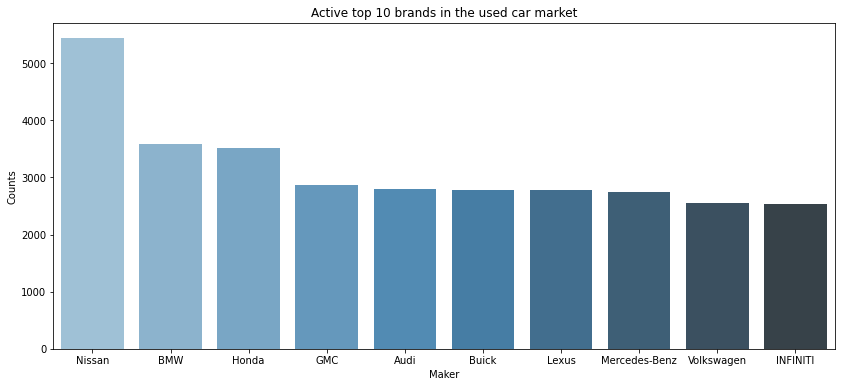

In [19]:
plt.figure(figsize=(14,6))
sns.barplot(x='Maker', y='counts', data=group_maker,  palette="Blues_d")
plt.title("Active top 10 brands in the used car market")
plt.xlabel("Maker")
plt.ylabel('Counts')

plt.show()

In [20]:
group_year = df2.groupby('YearMade').size().reset_index(name='counts')

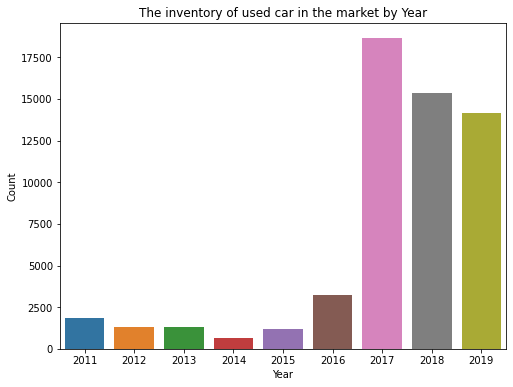

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x='YearMade', y='counts', data=group_year)
plt.title("The inventory of used car in the market by Year")
plt.xlabel("Year")
plt.ylabel('Count')
plt.show()

In [22]:
df2 = df2.dropna()

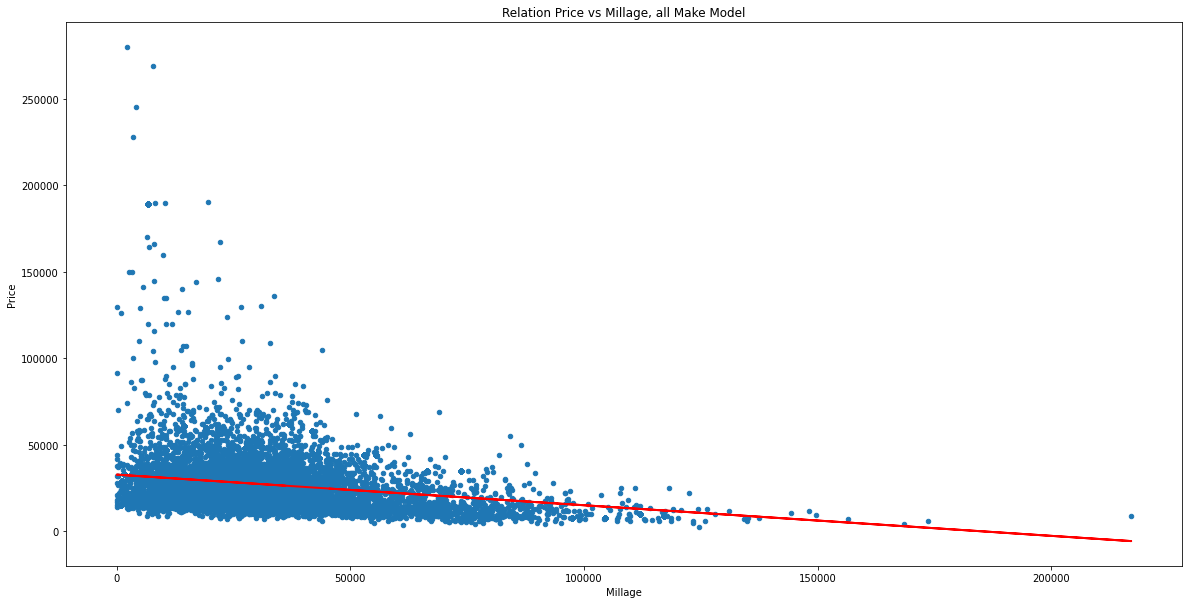

Linear Regression coefficient is [-0.17686217]


In [23]:
mil = df2['Millage'].values.reshape(-1,1)
pri = df2['Price']
reg = linear_model.LinearRegression()
reg.fit(mil, pri)
df2.plot(kind='scatter', x='Millage', y='Price',figsize = (20,10))
plt.plot(mil, reg.predict(mil), color='red', linewidth=2)
plt.title("Relation Price vs Millage, all Make Model")
plt.show()
print("Linear Regression coefficient is", reg.coef_)

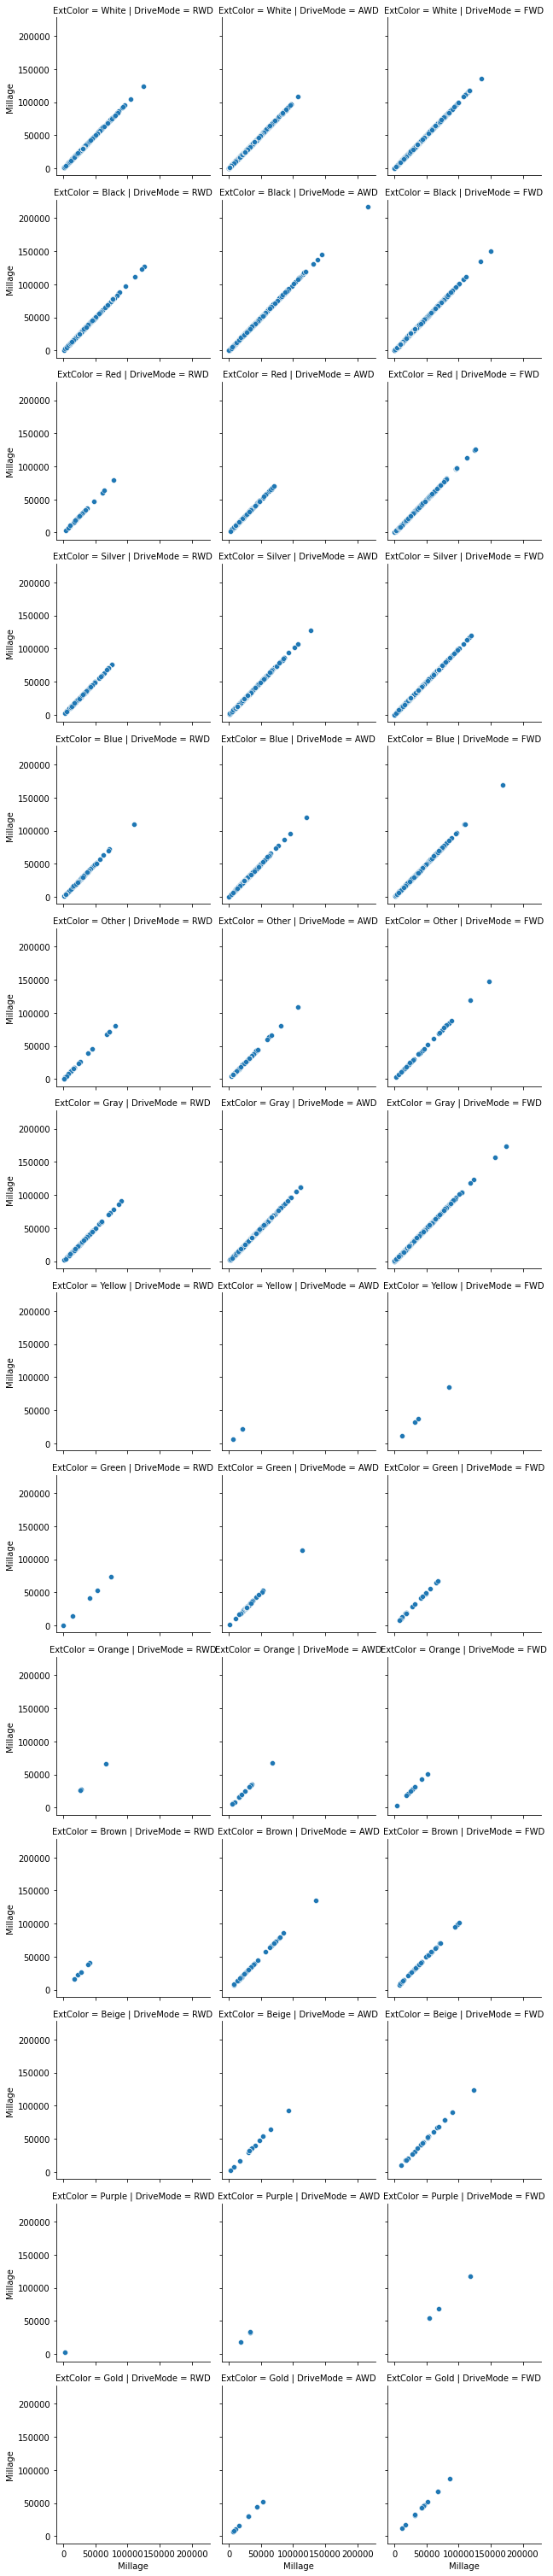

In [24]:
g = sns.FacetGrid(df2, col="DriveMode",  row="ExtColor")
g.map(sns.scatterplot, "Millage", "Millage")

In [25]:
Age_Price = df2.groupby('CarAge')['Price'].mean().reset_index(name='MeanPrice')

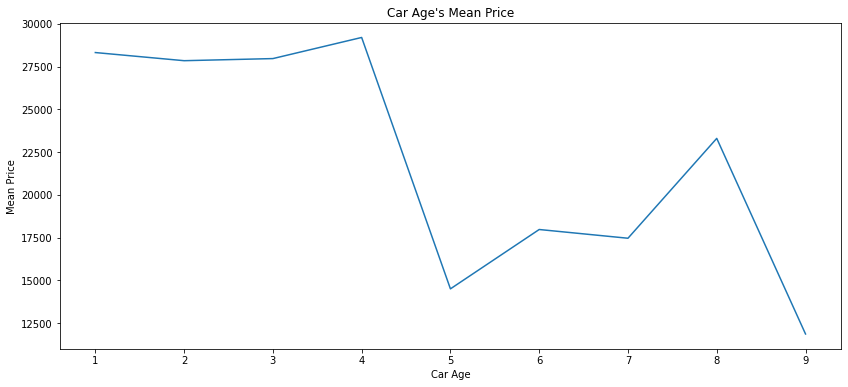

In [26]:
plt.figure(figsize=(14,6))
sns.lineplot(x='CarAge', y='MeanPrice', data=Age_Price,  palette="deep")
plt.title("Car Age's Mean Price")
plt.xlabel("Car Age")
plt.ylabel('Mean Price')
plt.show()

##### Based on the chart, if the car's life exceeds four years, the used price would be a significant decline possibility.

In [27]:
Ext_Color_Price = df2.groupby('ExtColor')['Price'].mean().reset_index(name='MeanPrice')

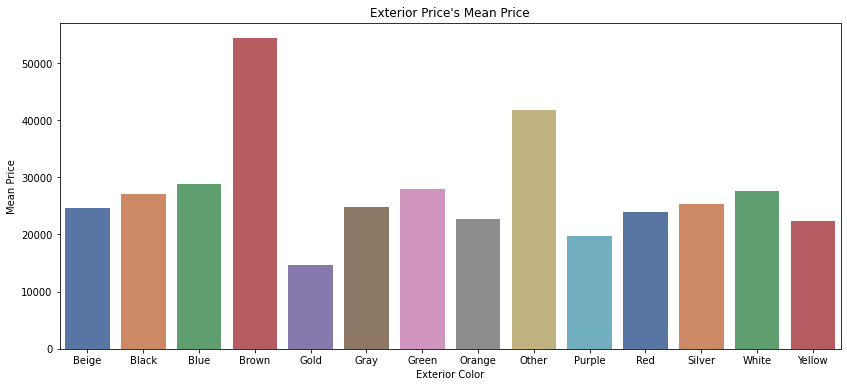

In [28]:
plt.figure(figsize=(14,6))
sns.barplot(x='ExtColor', y='MeanPrice', data=Ext_Color_Price ,  palette="deep")
plt.title("Exterior Price's Mean Price")
plt.xlabel("Exterior Color")
plt.ylabel('Mean Price')
plt.show()

## Model

In [33]:
df4 = df.copy()

In [34]:
df4 = df4.drop(['Model','Maker','IntColor','YearMade'], axis = 1)

In [35]:
le = LabelEncoder()
df4["Status"] = le.fit_transform(df4["Status"])
df4["ExtColor"] = le.fit_transform(df4["ExtColor"])
df4["Transmission"] = le.fit_transform(df4["Transmission"])
df4["DriveMode"] = le.fit_transform(df4["DriveMode"])
df4.head()

,Status,Price,Millage,ExtColor,Transmission,DriveMode,CarAge
0,1,19995.0,45623,12,0,2,3
1,1,9995.0,87244,1,0,0,8
2,1,10395.0,8464,1,1,1,1
3,1,10590.0,45466,10,1,1,5
4,1,16995.0,27929,12,0,0,1


In [36]:
X = df4.drop('Price',axis=1)
y = df4['Price']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Random Forest

In [38]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

In [50]:
r2_score(y_pred, y_test)

0.8588196636677056

In [54]:
params = {'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300]}

model = GridSearchCV(rf_reg, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [60]:
rf_reg = RandomForestRegressor(bootstrap = True, max_depth =40,max_features = 'sqrt', min_samples_leaf =2,min_samples_split = 10,n_estimators = 100)
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

In [61]:
r2_score(y_pred, y_test)

0.8783146314217899

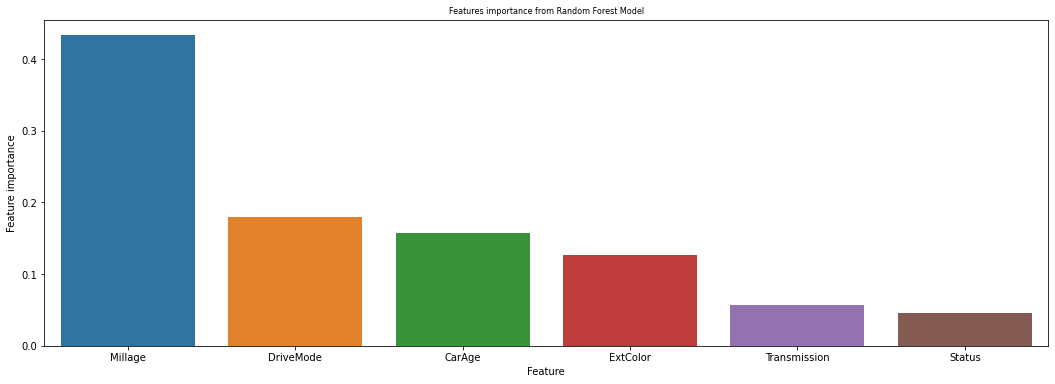

In [107]:
Feature_importance = pd.DataFrame({'Feature': X.columns, 'Feature importance': rf_reg.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (18,6))
plt.title('Features importance from Random Forest Model',fontsize=8)
feature_bar = sns.barplot(x='Feature',y='Feature importance',data=Feature_importance)
plt.show() 

#### SVM

In [91]:
scaler = StandardScaler()
X_train_ss=scaler.fit_transform(X_train)
X_test_ss=scaler.fit_transform(X_test)

In [104]:
svr = SVR(kernel='rbf').fit(X_train_ss,y_train)
y_pred_svr=svr.predict(X_test_ss)

In [105]:
y_pred_svr= y_pred_svr.reshape(-1,1)

In [106]:
r2_score(y_test, y_pred_svr)

0.07089265881521722